###1. What is the range of selling prices in the dataset?

In [ ]:
import pandas as pd
file_path = '/content/sample_data/BIKE DETAILS'
data = pd.read_csv('/content/sample_data/BIKE DETAILS')
# Calculate the range of the selling_price column (excluding missing or invalid values)
selling_price_range = data['selling_price'].min(), data['selling_price'].max()
selling_price_range


(5000, 760000)

###2. What is the median selling price for bikes in the dataset?

In [ ]:
import pandas as pd
file_path = '/content/sample_data/BIKE DETAILS'
data = pd.read_csv('/content/sample_data/BIKE DETAILS')
# Calculate the median of the selling_price column
median_selling_price = data['selling_price'].median()
median_selling_price

45000.0

###3. What is the most common seller type?

In [ ]:
import pandas as pd
file_path = '/content/sample_data/BIKE DETAILS'
data = pd.read_csv('/content/sample_data/BIKE DETAILS')
# Determine the most common seller type
most_common_seller_type = data['seller_type'].mode()[0]
most_common_seller_type

'Individual'

###4. How many bikes have driven more than 50,000 kilometers?

In [ ]:
import pandas as pd
file_path = '/content/sample_data/BIKE DETAILS'
data = pd.read_csv('/content/sample_data/BIKE DETAILS')
# Count the number of bikes that have driven more than 50,000 kilometers
bikes_above_50000_km = data[data['km_driven'] > 50000].shape[0]
bikes_above_50000_km

170

###5. What is the average km_driven value for each ownership type?

In [ ]:
import pandas as pd
file_path = '/content/sample_data/BIKE DETAILS'
data = pd.read_csv('/content/sample_data/BIKE DETAILS')
# Group the data by 'owner' and calculate the average 'km_driven' for each ownership type
average_km_by_owner = data.groupby('owner')['km_driven'].mean()
average_km_by_owner

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


###6. What proportion of bikes are from the year 2015 or older?

In [ ]:
import pandas as pd
file_path = '/content/sample_data/BIKE DETAILS'
data = pd.read_csv('/content/sample_data/BIKE DETAILS')
# Calculate the proportion of bikes from the year 2015 or older
bikes_2015_or_older = data[data['year'] <= 2015].shape[0]
total_bikes = data.shape[0]
proportion_2015_or_older = bikes_2015_or_older / total_bikes
proportion_2015_or_older

0.5664467483506126

###7. What is the trend of missing values across the dataset?

In [ ]:
import pandas as pd
file_path = '/content/sample_data/BIKE DETAILS'
data = pd.read_csv('/content/sample_data/BIKE DETAILS')
# Calculate the count of missing values for each column in the dataset
missing_values = data.isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100

# Combine the count and percentage into a single DataFrame for easier interpretation
missing_values_summary = pd.DataFrame({
    "Missing Count": missing_values,
    "Percentage (%)": missing_values_percentage
})
missing_values_summary

,Missing Count,Percentage (%)
name,0,0.000000
selling_price,0,0.000000
year,0,0.000000
seller_type,0,0.000000
owner,0,0.000000
km_driven,0,0.000000
ex_showroom_price,435,40.999057


###8. What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
import pandas as pd
file_path = '/content/sample_data/BIKE DETAILS'
data = pd.read_csv('/content/sample_data/BIKE DETAILS')
# Find the highest ex_showroom_price and the corresponding bike(s)
max_ex_showroom_price = data['ex_showroom_price'].max()
bike_with_max_price = data[data['ex_showroom_price'] == max_ex_showroom_price][['name', 'ex_showroom_price']]
max_ex_showroom_price, bike_with_max_price

(1278000.0,
                            name  ex_showroom_price
 134  Harley-Davidson Street Bob          1278000.0)

###9. What is the total number of bikes listed by each seller type?

In [ ]:
import pandas as pd
file_path = '/content/sample_data/BIKE DETAILS'
data = pd.read_csv('/content/sample_data/BIKE DETAILS')
# Count the number of bikes for each seller type
bikes_by_seller_type = data['seller_type'].value_counts()
print(bikes_by_seller_type)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


###10. What is the relationship between selling_price and km_driven for first-owner bikes?

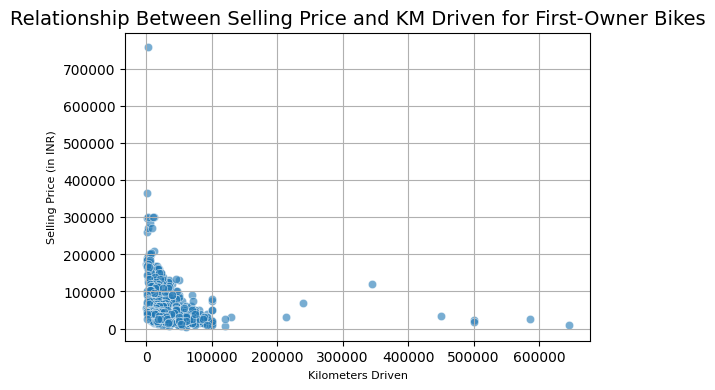

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
file_path = '/content/sample_data/BIKE DETAILS'
data = pd.read_csv('/content/sample_data/BIKE DETAILS')
# Filter the data to include only first-owner bikes
first_owner_bikes = data[data['owner'] == '1st owner']

# Check if there are missing or invalid values in the relevant columns
first_owner_bikes = first_owner_bikes[['selling_price', 'km_driven']].dropna()

# Plot the relationship using a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price', alpha=0.6)
plt.title('Relationship Between Selling Price and KM Driven for First-Owner Bikes', fontsize=14)
plt.xlabel('Kilometers Driven', fontsize=8)
plt.ylabel('Selling Price (in INR)', fontsize=8)
plt.grid(True)
plt.show()


###11. Identify and remove outliers in the km_driven column using the IQR method?

In [ ]:
import pandas as pd
file_path = '/content/sample_data/BIKE DETAILS'
data = pd.read_csv('/content/sample_data/BIKE DETAILS')
# Create a subset of the data for first-owner bikes
first_owner_bikes = data[data['owner'] == 'First Owner'] # Filter data for 'First Owner'
# Calculate the IQR for the 'km_driven' column
Q1 = first_owner_bikes['km_driven'].quantile(0.25)
Q3 = first_owner_bikes['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = first_owner_bikes[(first_owner_bikes['km_driven'] < lower_bound) | (first_owner_bikes['km_driven'] > upper_bound)]

# Remove outliers
cleaned_data = first_owner_bikes[
    (first_owner_bikes['km_driven'] >= lower_bound) & (first_owner_bikes['km_driven'] <= upper_bound)
]

outliers.shape, cleaned_data.shape

((0, 7), (0, 7))

###12. Perform a bivariate analysis to visualize the relationship between year and selling_price?

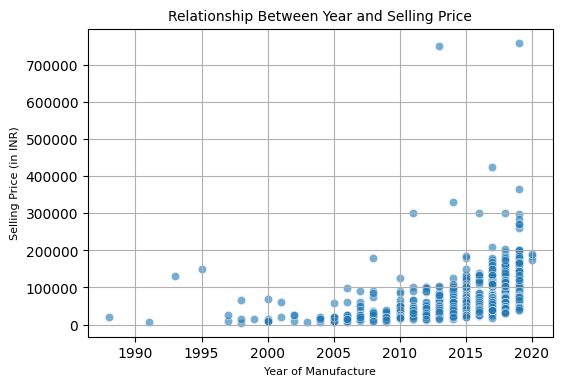

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
file_path = '/content/sample_data/BIKE DETAILS'
data = pd.read_csv('/content/sample_data/BIKE DETAILS')
# Filter relevant columns and remove missing values
year_price_data = data[['year', 'selling_price']].dropna()

# Plot a scatter plot to visualize the relationship between year and selling price
plt.figure(figsize=(6, 4))
sns.scatterplot(data=year_price_data, x='year', y='selling_price', alpha=0.6)
plt.title('Relationship Between Year and Selling Price', fontsize=10)
plt.xlabel('Year of Manufacture', fontsize=8)
plt.ylabel('Selling Price (in INR)', fontsize=8)
plt.grid(True)
plt.show()

###13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [ ]:
from datetime import datetime
file_path = '/content/sample_data/BIKE DETAILS'
bike_data = pd.read_csv('/content/sample_data/BIKE DETAILS')
# Add a new column for the bike's age
current_year = datetime.now().year
bike_data['age'] = current_year - bike_data['year']

# Calculate the average depreciation in selling price per year of age
average_depreciation = bike_data.groupby('age')['selling_price'].mean()

average_depreciation


,selling_price
age,
5,183333.333333
6,119689.511628
7,87660.374046
8,78894.736842
9,58469.018692
10,56500.000000
11,48668.131868
12,51136.986301
13,35748.400000


###14. Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
import pandas as pd
file_path = '/content/sample_data/BIKE DETAILS'
bike_data = pd.read_csv('/content/sample_data/BIKE DETAILS')

# Group by year and calculate the average selling price for each year
year_avg_price = bike_data.groupby('year')['selling_price'].mean()

# Merge the average price with the original dataset
bike_data = bike_data.merge(year_avg_price, on='year', suffixes=('', '_avg'))

# Define a threshold for significantly above average (e.g., 1.5 times the average price)
threshold_factor = 1.5
bike_data['above_avg'] = bike_data['selling_price'] > (threshold_factor * bike_data['selling_price_avg'])

# Filter bikes priced significantly above the average price
significant_bikes = bike_data[bike_data['above_avg']]

# Select relevant columns for readability
significant_bikes_details = significant_bikes[['name', 'year', 'selling_price', 'selling_price_avg']]

# Display the result
significant_bikes_details


,name,year,selling_price,selling_price_avg
2,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],2008,180000,34289.285714
13,Yamaha YZF R3,2019,365000,119689.511628
18,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
23,Jawa Standard,2019,180000,119689.511628
...,...,...,...,...
979,Royal Enfield Thunder 500,2015,105000,56500.000000
981,Royal Enfield Thunder 350,2013,105000,51136.986301
983,Royal Enfield Classic 350,2015,100000,56500.000000
984,Royal Enfield Classic 500,2014,95000,48668.131868


###15. Develop a correlation matrix for numeric columns and visualize it using a heatmap?

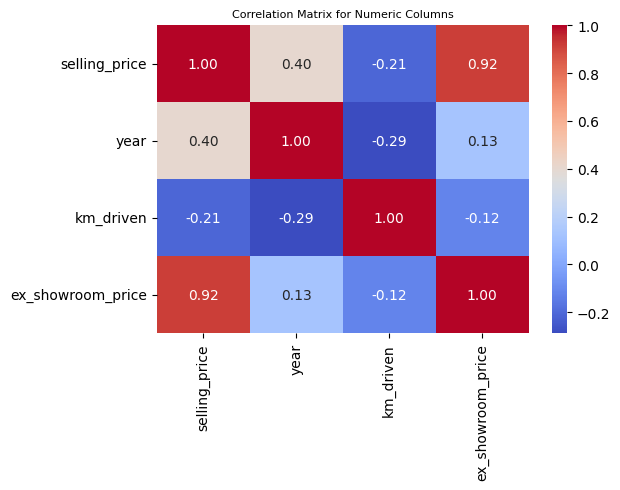

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
file_path = '/content/sample_data/BIKE DETAILS'
data = pd.read_csv('/content/sample_data/BIKE DETAILS')
# Select numeric columns from the dataset
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Numeric Columns", fontsize=8)
plt.show()
